<a href="https://colab.research.google.com/github/Jaomiew/DPDM2023/blob/main/Research_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


# Input Data

In [3]:
Data = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/data.csv')
Data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,no-date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,22/1/2020,23/1/2020,5/2/2020,13.0,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,30/1/2020,2/3/2020,32.0,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,30/1/2020,19/2/2020,20.0,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,26/1/2020,30/1/2020,15/2/2020,16.0,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,31/1/2020,24/2/2020,24.0,NaN,released


## เลือกคอลัมน์ที่จะใช้

In [4]:
df = pd.DataFrame(Data)

In [5]:
New_Data = df[['sex', 'age', 'infection_case', 'no-date', 'state']]

In [6]:
New_Data

,sex,age,infection_case,no-date,state
0,male,50s,overseas inflow,13.0,released
1,male,30s,overseas inflow,32.0,released
2,male,50s,contact with patient,20.0,released
3,male,20s,overseas inflow,16.0,released
4,female,20s,contact with patient,24.0,released
...,...,...,...,...,...
5160,female,30s,overseas inflow,14.0,released
5161,NaN,NaN,overseas inflow,8.0,released
5162,NaN,NaN,overseas inflow,NaN,isolated
5163,NaN,NaN,overseas inflow,NaN,isolated


## เช็ค Missing value

In [7]:
New_Data.isnull().any()

sex               True
age               True
infection_case    True
no-date           True
state             True
dtype: bool

In [11]:
New_Data = New_Data.fillna({'sex':'unknown','age':'unknown','infection_case':'unknown','no-date':0})
New_Data

,sex,age,infection_case,no-date,state
0,male,50s,overseas inflow,13.0,released
1,male,30s,overseas inflow,32.0,released
2,male,50s,contact with patient,20.0,released
3,male,20s,overseas inflow,16.0,released
4,female,20s,contact with patient,24.0,released
...,...,...,...,...,...
5160,female,30s,overseas inflow,14.0,released
5161,unknown,unknown,overseas inflow,8.0,released
5162,unknown,unknown,overseas inflow,0.0,isolated
5163,unknown,unknown,overseas inflow,0.0,isolated


In [12]:
New_Data.isnull().any()

sex               False
age               False
infection_case    False
no-date           False
state              True
dtype: bool

In [17]:
New_Data[New_Data['state'].isnull()]

,sex,age,infection_case,no-date,state
4045,female,20s,unknown,34.0,NaN


In [21]:
New_Data = New_Data.dropna()
New_Data

,sex,age,infection_case,no-date,state
0,male,50s,overseas inflow,13.0,released
1,male,30s,overseas inflow,32.0,released
2,male,50s,contact with patient,20.0,released
3,male,20s,overseas inflow,16.0,released
4,female,20s,contact with patient,24.0,released
...,...,...,...,...,...
5160,female,30s,overseas inflow,14.0,released
5161,unknown,unknown,overseas inflow,8.0,released
5162,unknown,unknown,overseas inflow,0.0,isolated
5163,unknown,unknown,overseas inflow,0.0,isolated


In [22]:
New_Data.isnull().any()

sex               False
age               False
infection_case    False
no-date           False
state             False
dtype: bool

# แทนค่าเป็นตัวเลข

In [34]:
set(New_Data['sex'])

{'female', 'male', 'unknown'}

In [35]:
New_Data = New_Data.replace({'female':0,'male':1,'unknown':9})
New_Data

,sex,age,infection_case,no-date,state
0,1,50s,overseas inflow,13.0,released
1,1,30s,overseas inflow,32.0,released
2,1,50s,contact with patient,20.0,released
3,1,20s,overseas inflow,16.0,released
4,0,20s,contact with patient,24.0,released
...,...,...,...,...,...
5160,0,30s,overseas inflow,14.0,released
5161,9,9,overseas inflow,8.0,released
5162,9,9,overseas inflow,0.0,isolated
5163,9,9,overseas inflow,0.0,isolated


In [38]:
set(New_Data['age'])

{'0s',
 '100s',
 '10s',
 '20s',
 '30s',
 '40s',
 '50s',
 '60s',
 '70s',
 '80s',
 9,
 '90s'}

In [39]:
New_Data = New_Data.replace({'0s':0,'10s':1,'20s':2,'30s':3,'40s':4,'50s':5,'60s':6,'70s':7,'80s':8,'90s':9,'100s':10})
New_Data

,sex,age,infection_case,no-date,state
0,1,5,overseas inflow,13.0,released
1,1,3,overseas inflow,32.0,released
2,1,5,contact with patient,20.0,released
3,1,2,overseas inflow,16.0,released
4,0,2,contact with patient,24.0,released
...,...,...,...,...,...
5160,0,3,overseas inflow,14.0,released
5161,9,9,overseas inflow,8.0,released
5162,9,9,overseas inflow,0.0,isolated
5163,9,9,overseas inflow,0.0,isolated


In [37]:
set(New_Data['infection_case']) #51

{9,
 'Anyang Gunpo Pastors Group',
 'Biblical Language study meeting',
 'Bonghwa Pureun Nursing Home',
 'Changnyeong Coin Karaoke',
 'Cheongdo Daenam Hospital',
 'Coupang Logistics Center',
 'Daejeon door-to-door sales',
 'Daezayeon Korea',
 'Day Care Center',
 'Dongan Church',
 'Dunsan Electronics Town',
 "Eunpyeong St. Mary's Hospital",
 'Gangnam Dongin Church',
 'Gangnam Yeoksam-dong gathering',
 'Geochang Church',
 'Geumcheon-gu rice milling machine manufacture',
 'Guri Collective Infection',
 'Guro-gu Call Center',
 'Gyeongsan Cham Joeun Community Center',
 'Gyeongsan Jeil Silver Town',
 'Gyeongsan Seorin Nursing Home',
 'Itaewon Clubs',
 'KB Life Insurance',
 'Korea Campus Crusade of Christ',
 'Milal Shelter',
 'Ministry of Oceans and Fisheries',
 'Onchun Church',
 'Orange Life',
 'Orange Town',
 'Pilgrimage to Israel',
 'Richway',
 'River of Grace Community Church',
 'SMR Newly Planted Churches Group',
 'Samsung Fire & Marine Insurance',
 'Samsung Medical Center',
 'Seocho Famil

In [40]:
set(New_Data['state'])

{'deceased', 'isolated', 'released'}

In [41]:
New_Data = New_Data.replace({'deceased':0,'isolated':1,'released':2})
New_Data

,sex,age,infection_case,no-date,state
0,1,5,overseas inflow,13.0,2
1,1,3,overseas inflow,32.0,2
2,1,5,contact with patient,20.0,2
3,1,2,overseas inflow,16.0,2
4,0,2,contact with patient,24.0,2
...,...,...,...,...,...
5160,0,3,overseas inflow,14.0,2
5161,9,9,overseas inflow,8.0,2
5162,9,9,overseas inflow,0.0,1
5163,9,9,overseas inflow,0.0,1


In [52]:
New_Data = New_Data[['sex', 'age', 'no-date', 'state']]
New_Data

,sex,age,no-date,state
0,1,5,13.0,2
1,1,3,32.0,2
2,1,5,20.0,2
3,1,2,16.0,2
4,0,2,24.0,2
...,...,...,...,...
5160,0,3,14.0,2
5161,9,9,8.0,2
5162,9,9,0.0,1
5163,9,9,0.0,1


## Set new data to split train and test

In [53]:
np.random.seed(seed = 789)

In [54]:
A = np.random.randint(2, size = len(New_Data))
A

array([1, 0, 0, ..., 1, 0, 1])

In [55]:
New_train = New_Data [A==1]
New_train.shape

(2596, 4)

In [56]:
New_test = New_Data [A==0]
New_test.shape

(2568, 4)

### Set data

In [57]:
NewX_train = New_train.iloc[:,:-1]
Newy_train = New_train.iloc[:,-1]
NewX_test = New_test.iloc[:,:-1]
Newy_test = New_test.iloc[:,-1]

# โมเดลที่ 1 ของ Decision Tree

## Define

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
from sklearn import tree

In [59]:
D_tree = DecisionTreeClassifier()

## Train

In [60]:
D_tree.fit(NewX_train,Newy_train)

DecisionTreeClassifier()

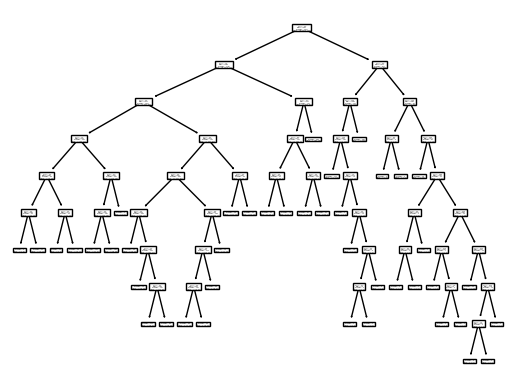

In [62]:
tree.plot_tree(D_tree);

## Test

In [64]:
from sklearn.metrics import accuracy_score

In [63]:
y_predictnt1 = D_tree.predict(NewX_test)

In [65]:
accuracy_score(Newy_test, y_predictnt1)

0.7141744548286605

# โมเดลที่ 2 ของ Naive Bayes

## Import

In [66]:
from sklearn.naive_bayes import GaussianNB

## Define

In [67]:
N_Bayes = GaussianNB()

## Train

In [68]:
N_Bayes.fit(NewX_train, Newy_train)

GaussianNB()

## Test

In [70]:
y_predic2 = N_Bayes.predict(NewX_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(Newy_test, y_predic2)

0.721183800623053

# โมเดลที่ 3 ของ Random Forest

## Import

In [72]:
from sklearn.ensemble import RandomForestClassifier

## Define

In [73]:
R_Forest = RandomForestClassifier()

## Train

In [74]:
R_Forest.fit(NewX_train, Newy_train)

RandomForestClassifier()

## Test

In [75]:
Y_predict3 = R_Forest.predict(NewX_test)
accuracy_score(Newy_test,Y_predict3)

0.7184579439252337

# โมเดลที่ 4 ของ K-nearest neighbor

## Import

In [76]:
from sklearn.neighbors import KNeighborsClassifier

## Define

In [84]:
KNN = KNeighborsClassifier(n_neighbors=3)

## Train

In [85]:
KNN.fit(NewX_train, Newy_train)

KNeighborsClassifier(n_neighbors=3)

## Test

In [86]:
Y_predict4 = KNN.predict(NewX_test)
accuracy_score(Newy_test,Y_predict4)

0.6004672897196262

# Validate model


### โมเดลที่ 1 ของ Decision Tree

In [87]:
y_predictnt1 = D_tree.predict(NewX_test)
accuracy_score(Newy_test, y_predictnt1)

0.7141744548286605

### โมเดลที่ 2 ของ Naive Bayes

In [88]:
y_predic2 = N_Bayes.predict(NewX_test)
accuracy_score(Newy_test, y_predic2)

0.721183800623053

### โมเดลที่ 3 ของ Random Forest

In [89]:
Y_predict3 = R_Forest.predict(NewX_test)
accuracy_score(Newy_test,Y_predict3)

0.7184579439252337

### โมเดลที่ 4 ของ K-nearest neighbor

In [90]:
Y_predict4 = KNN.predict(NewX_test)
accuracy_score(Newy_test,Y_predict4)

0.6004672897196262

# Evaluation

## โมเดลที่ 3 ของ Random Forest

### Retrain model with full training data

In [91]:
R_Forest = RandomForestClassifier()
R_Forest.fit(NewX_train, Newy_train)

RandomForestClassifier()

### Evaluation

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

### Accuracy Score

In [93]:
Y_predict3 = R_Forest.predict(NewX_test)
accuracy_score(Newy_test,Y_predict3)

0.7184579439252337

### Confusion Matrix

In [94]:
cm = confusion_matrix(Newy_test,Y_predict3)
cm

array([[  0,  25,   5],
       [  0, 922, 160],
       [  0, 533, 923]])

### Classification Report

In [95]:
print(classification_report(Newy_test,Y_predict3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.62      0.85      0.72      1082
           2       0.85      0.63      0.73      1456

    accuracy                           0.72      2568
   macro avg       0.49      0.50      0.48      2568
weighted avg       0.74      0.72      0.71      2568



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# กราฟ

In [97]:
import matplotlib.pyplot as plt

In [96]:
# ทดสอบโมเดลและคำนวณความแม่นยำ
dt_accuracy = accuracy_score(Newy_test, y_predictnt1)
nb_accuracy = accuracy_score(Newy_test, y_predic2)
rf_accuracy = accuracy_score(Newy_test,Y_predict3)
knn_accuracy = accuracy_score(Newy_test,Y_predict4)

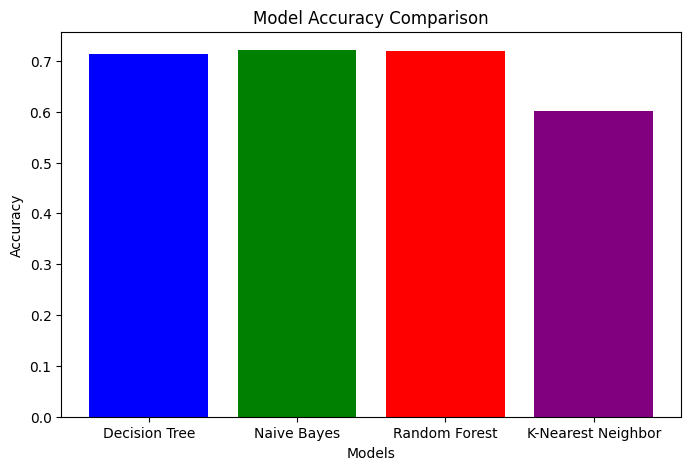

In [108]:
# สร้างกราฟ
models = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'K-Nearest Neighbor']
accuracies = [dt_accuracy, nb_accuracy, rf_accuracy, knn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
